In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_rank
from scipy.optimize import linprog # for LP
import datetime
import math
from scipy.sparse import rand
from scipy.optimize import lsq_linear
from IPython.display import display, Latex # for output compilation
#specify that all columns should be shown
pd.set_option('display.max_rows', None)

$$ \left\{\begin{matrix} 
a_{11} x_1 + a_{12} x_2 + ... +a_{n1} x_n = b_1\\ 
a_{21} x_1 + a_{22} x_2 + ... +a_{21} x_n = b_2\\ 
...\\
a_{m1} x_1 + a_{m2} x_2 + ... +a_{m1} x_n = b_m\\
\end{matrix}\right .$$



$$ A = \begin{bmatrix}a_{11} & \cdots & a_{1n} \\ \vdots & \ddots & \vdots \\ a_{m1} & \cdots & a_{mn}\end{bmatrix}, \ x = \begin{bmatrix}x_1 \\ \vdots \\ x_n\end{bmatrix}, \ B =\begin{bmatrix}b_1 \\ \vdots \\ b_n\end{bmatrix} $$

$$ Ax = b $$

$$LL < x_j < UL$$

$$x = \alpha x + \beta $$
$$x^{(k+1)} = \alpha x^{(k)} + \beta $$
$$x^{(k+1)} = \alpha x^{(k)} + \beta $$
$$ \left \| x^{(k+1)} - x^{(k)} \right \|< \varepsilon \rightarrow min$$

### Read initial data

In [2]:
path_to_preprocessed = 'Data/Schöpfleuthnergasse/Preprocessed data/' #write path to the you own folder

In [40]:
A_df = pd.read_csv(path_to_preprocessed + 'A_matrix_class.csv')
b_df = pd.read_csv(path_to_preprocessed + 'b_vector_class.csv')
months_df = pd.read_csv(path_to_preprocessed + 'month_labels_only_class.csv')
labels_df = pd.read_csv(path_to_preprocessed + 'types_labels_only_class.csv')

In [8]:
b = np.array(b_df.amount, dtype = float)
A = np.array(A_df, dtype = float, order='C')

### Constraints

In [33]:
## We can define constrains for prices( can be taken from supplier/fin.report???)
lb = 2000
ub = 10000

In [34]:
res = lsq_linear(A, b, bounds=(lb, ub), lsmr_tol='auto', method = 'trf', verbose=2)
res

   Iteration        Cost      Cost reduction    Step norm     Optimality   
       0         6.9117e+13                                    3.48e+13    
       1         2.6887e+13      4.22e+13       1.23e+04       1.03e+13    
       2         1.5709e+13      1.12e+13       5.83e+03       3.85e+12    
       3         8.4935e+12      7.22e+12       4.31e+03       8.22e+11    
       4         7.1275e+12      1.37e+12       2.99e+02       3.77e+11    
       5         6.6980e+12      4.30e+11       6.38e+03       1.89e+11    
       6         6.3918e+12      3.06e+11       1.32e+03       9.94e+10    
       7         6.1740e+12      2.18e+11       1.21e+03       8.80e+09    
       8         6.1543e+12      1.97e+10       2.74e+02       1.23e+08    
       9         6.1541e+12      1.81e+08       4.73e+00       1.89e+04    
      10         6.1541e+12      2.13e+04       9.29e-04       8.22e-04    
      11         6.1541e+12      2.04e-03       1.86e-11       8.22e-04    
The relative

       message: The relative change of the cost function is less than `tol`.
       success: True
        status: 2
           fun: [ 5.317e+05  2.529e+06 ... -8.923e+05  2.514e+05]
             x: [ 6.265e+03  2.000e+03 ...  2.000e+03  2.000e+03]
           nit: 12
          cost: 6154069739628.961
    optimality: 0.0008215583971214805
   active_mask: [ 0 -1 ... -1 -1]
 unbounded_sol: (array([ 1.973e+04, -4.593e+04, ..., -5.060e+04, -3.817e+04]), array([], dtype=float64), 14, array([ 1.655e+03,  9.845e+02, ...,  1.791e-14,  1.376e-14]))

In [35]:
XXs = pd.DataFrame(res['x'], columns = ['x_i'], index = months_df)
fun = pd.DataFrame(res['fun'], columns = ['res'])


### Visualization

<Axes: >

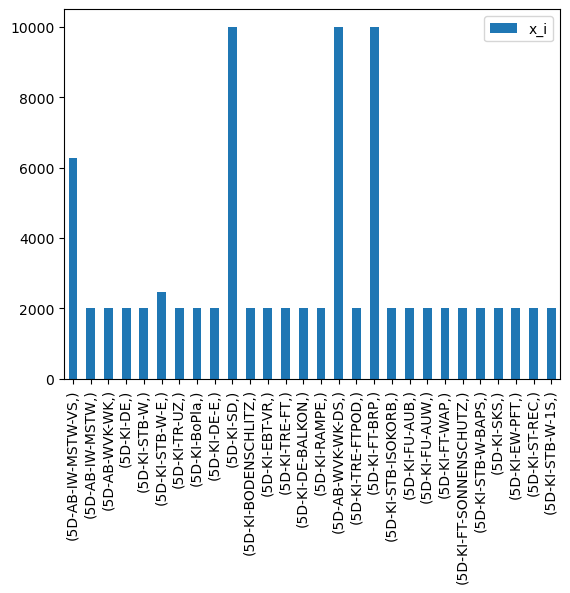

In [36]:
XXs.plot.bar()

In [37]:
str_latex = '+'.join( str(round(XXs.x_i.iloc[i],0)) +'x_{' + str(i+1) + '}' for i in range(XXs['x_i'].shape[0]))

In [38]:
display(Latex('$$f(x)=' + str_latex + '$$'))

<IPython.core.display.Latex object>